# PARAMETERS
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid gray"> </hr>

<center><img src="https://cdn.lynda.com/course/645049/645049-636628390565991366-16x9.jpg" width="500"/></center>

It is impossible to talk about models and machine learning without mentioning parameters. A model parameter is a configuration variable that is internal to the model and whose value can be estimated from the given data. [1]

<hr style="border:2px solid gray"> </hr>

In [1]:
# Arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

In [2]:
# x values.
x = np.linspace(0.0, 10.0, 21)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [3]:
# y values based on x.
y = 4.0 * x - 2.0 + np.random.normal(0.0, 1.0, len(x))
y

array([-0.49324565,  0.35653094,  1.224097  ,  3.89326709,  4.83354869,
        7.76872883,  9.37979918, 14.62943497, 13.73892333, 15.77187196,
       15.45704858, 18.7999918 , 20.63076417, 23.05158307, 25.97693575,
       27.84841316, 30.59845354, 31.32341423, 33.98896446, 35.41842717,
       38.33539059])

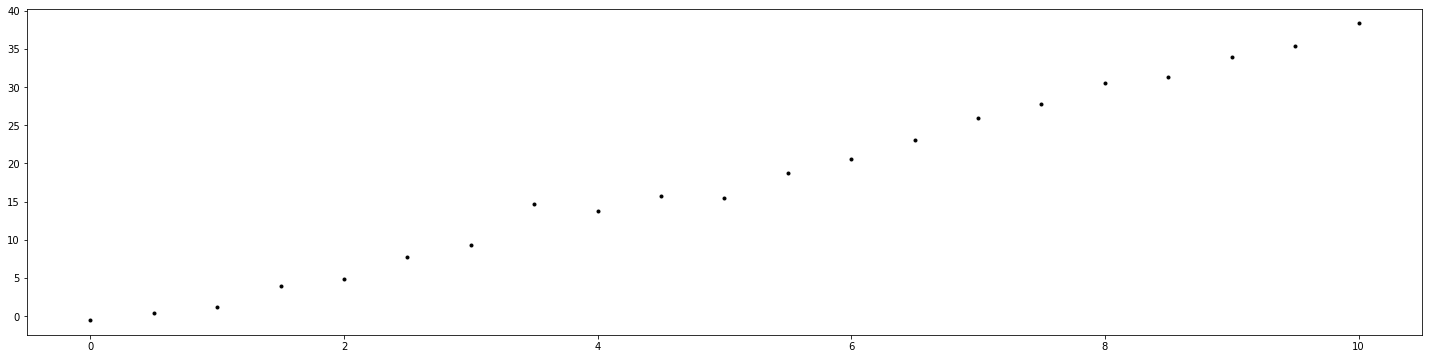

In [4]:
# Create a plot.
fig, ax = plt.subplots(figsize=(25,6))

# Plot x vs y.
ax.plot(x, y, 'k.');


We can see that the data follows the straight line adjusted for some noise. If we were just given x and y values without knowing the relationship between them, we can try to find the parameters m and c (4 and -2 in the example above). Those are the values that relate x and y together.

We do that using *numpy.polyfit* function. This function takes 3 values:
- x
- y
- degree of the fitting polynomial

x and y values are obvious and are already given. We need to decide what degree will be used. When deciding what degree to use we shouldn't give the model too much freedom 

In [15]:
# Use x and y to try to find the original parameters.
origParams = 4, -2
params = np.polyfit(x, y, 1)
print("Original parameters:", origParams)
print("Generated parameters:", params)

Original parameters: (4, -2)
Generated parameters: [ 3.95176115 -2.01917035]


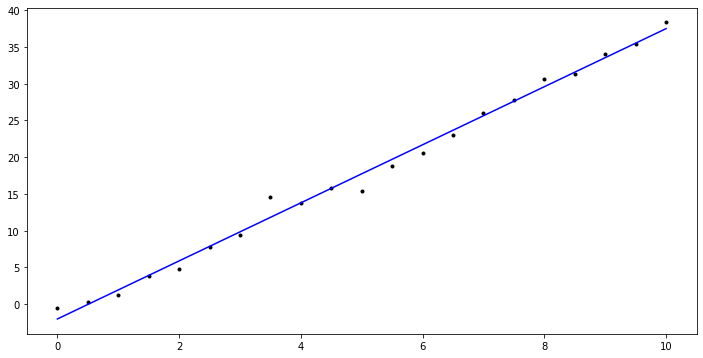

In [16]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x + params[1], 'b-');

<hr style="border-top: 1px solid #001a79;" />

<h4 style="color: #001a79;">EXERCISE 1</h4>

<h5 style="color: #001a79;">Use numpy's polyfit to fit polynomials to the following two data sets.

- Data Set 1:

    - x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
    - y = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7] <br><br>

    
- Data Set 2:

    - x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
    - y = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6] </h5>

<hr style="border-top: 1px solid #001a79;" />

### REFERENCES

1. https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models
2. 